# Challenge

Using this dataset:

+ Apply dimensionality reduction techniques to visualize the observations.
+ Apply clustering techniques to group together similar observations.

In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

This wholesale customers dataset is downloaded from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Wholesale+customers). The dataset contains information of clients of a wholesale distributor. It includes the annual spending on diverse product categories and demographics. 

The attributes are as following:

Attribute Information:

1. FRESH: annual spending (m.u.) on fresh products (Continuous)
2. MILK: annual spending (m.u.) on milk products (Continuous) 
3. GROCERY: annual spending (m.u.) on grocery products (Continuous)
4. FROZEN: annual spending (m.u.) on frozen products (Continuous) 
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6. DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous)
7. CHANNEL: customers channel - Hotel/Restaurant/Cafe or Retail channel (Nominal) 
8. REGION: customers region: Lisnon, Oporto or Other (Nominal) 

In [2]:
#import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
#read in data

df = pd.read_csv('Wholesale customers data.csv')

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


## EDA

As we can see above, there's no missing values in this dataset. Given by attribute description, there are two nominal variables and six numeric variables. Let's explore each of them. 

In [23]:
#change channel and region to categorical 

channel = []
region = []

df1 = pd.DataFrame(df.drop(['Channel', 'Region'], axis=1))

for i in df['Channel']:
    if i==1: 
        channel.append('HRC')
    else: 
        channel.append('Retail')
        
for j in df['Region']:
    if j==1:
        region.append('Lisbon')
    elif j==2:
        region.append('Oporto')
    else:
        region.append('Other')

df1['Channel'] = channel
df1['Region'] = region

df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region
0,12669,9656,7561,214,2674,1338,Retail,Other
1,7057,9810,9568,1762,3293,1776,Retail,Other
2,6353,8808,7684,2405,3516,7844,Retail,Other
3,13265,1196,4221,6404,507,1788,HRC,Other
4,22615,5410,7198,3915,1777,5185,Retail,Other


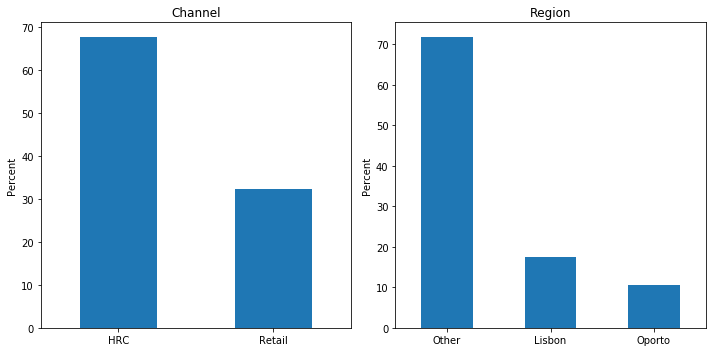

In [150]:
var = ['Channel', 'Region']

plt.figure(figsize=(10,5))

for i in range(len(var)):
    
    plt.subplot(1,2,i+1)

    channel_counts = (df1[var[i]]. value_counts(normalize=True).rename('Percent').mul(100))

    channel_counts.plot(kind='bar')

    plt.xticks(rotation=360)
    plt.ylabel('Percent')
    plt.title(var[i])

plt.tight_layout()
plt.show()

About 68% clients are from the hotel/restaurant/cafe channel. More than 70% clients are from regions other than Lisbon and Oporto. 

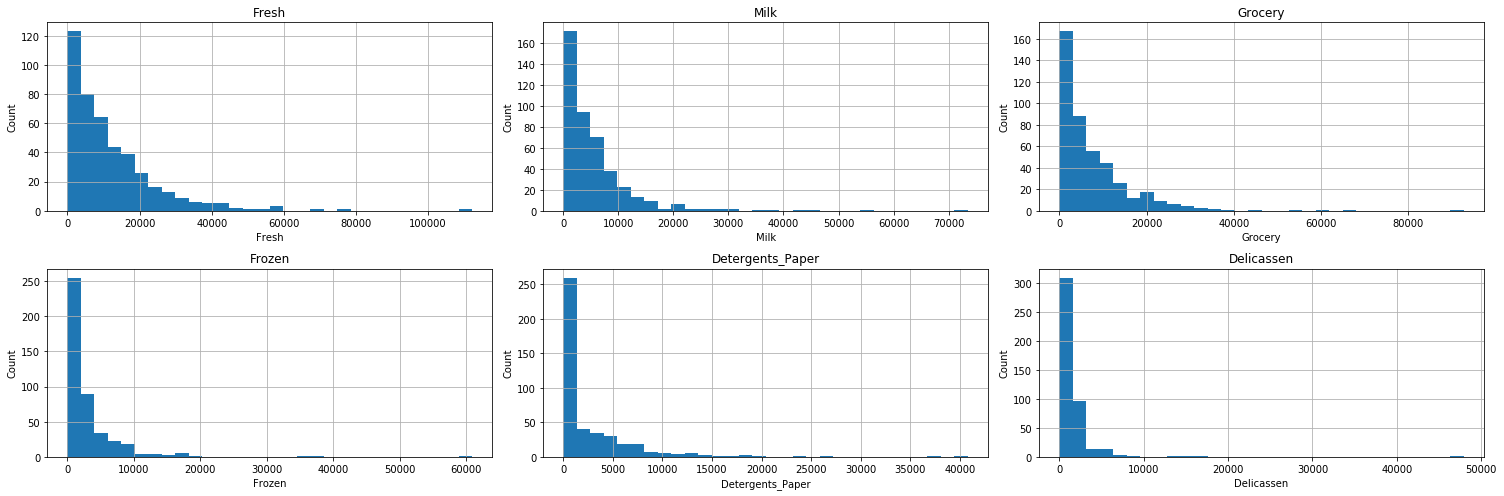

In [152]:
num = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

plt.figure(figsize=(21,7))

for i in range(len(num)):
    
    plt.subplot(2,3,i+1)
    
    df1[num[i]].hist(bins=30)
    
    plt.xlabel(num[i])
    plt.ylabel('Count')
    plt.title(num[i])

plt.tight_layout()
plt.show()

All numeric variables follow a poisson distribution. 

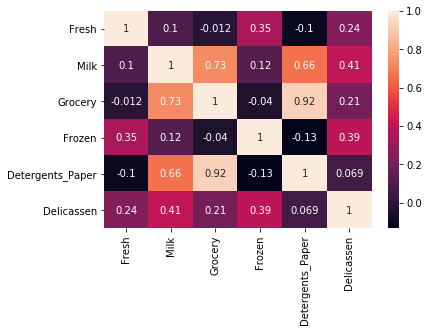

In [179]:
sns.heatmap(df1.corr(), annot=True)

plt.show()

As we can see from the correlation matrix, annual spending on 

+ milk and grocery are highly correlated (r=0.73)
+ milk and detergents_paper are highly correlated (r=0.66)
+ grocery and detergents_paper are highly correlated (r=0.92)

## Feature Engineering

Use all variables as features and dummy code categorical variables. 

In [25]:
X = pd.DataFrame(pd.get_dummies(df1, drop_first=True))

X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Retail,Region_Oporto,Region_Other
0,12669,9656,7561,214,2674,1338,1,0,1
1,7057,9810,9568,1762,3293,1776,1,0,1
2,6353,8808,7684,2405,3516,7844,1,0,1
3,13265,1196,4221,6404,507,1788,0,0,1
4,22615,5410,7198,3915,1777,5185,1,0,1


## Apply dimensionality reduction techniques to visualize the observations.

### 1. PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X)

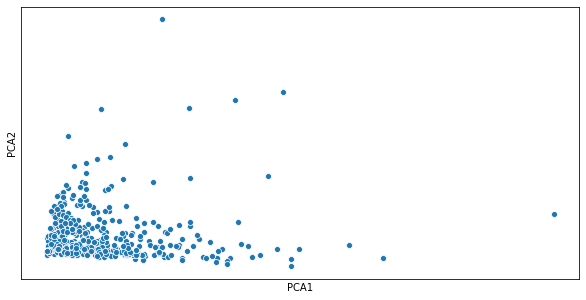

In [32]:
plt.figure(figsize=(10,5))

sns.scatterplot(pca_components[:,0], pca_components[:,1])
 z m
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xticks([])
plt.yticks([])
plt.show()

### 2. T-SNE

In [33]:
from sklearn.manifold import TSNE

In [34]:
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 440 samples in 0.000s...
[t-SNE] Computed neighbors for 440 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 440 / 440
[t-SNE] Mean sigma: 1729.188827
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.914173
[t-SNE] KL divergence after 300 iterations: 0.418411


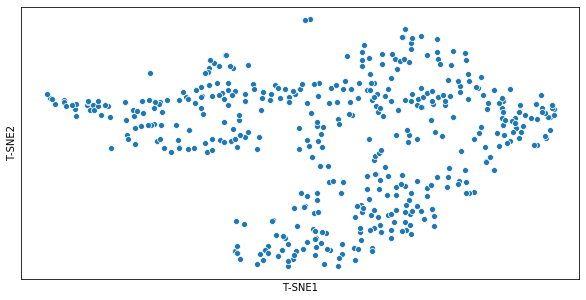

In [35]:
plt.figure(figsize=(10,5))

sns.scatterplot(tsne_results[:,0], tsne_results[:,1])

plt.xlabel('T-SNE1')
plt.ylabel('T-SNE2')
plt.xticks([])
plt.yticks([])
plt.show()

### 3. UMAP

In [36]:
import umap

In [37]:
umap_results = umap.UMAP(n_neighbors=5,
                         min_dist=0.3,
                         metric='correlation').fit_transform(X)

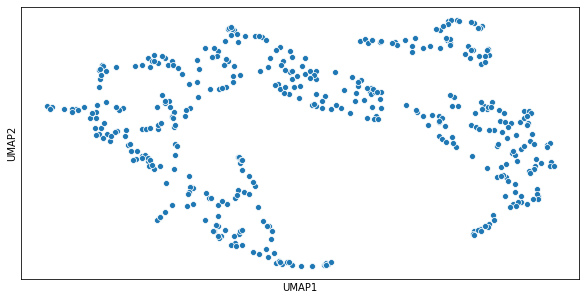

In [38]:
plt.figure(figsize=(10,5))

sns.scatterplot(umap_results[:,0], umap_results[:,1])

plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.xticks([])
plt.yticks([])
plt.show()

As can be seen from three scatter plots, UMAP can clearly identify three different groupings, whereas it's hard to identify groups with PCA and T-SNE. 

## Apply clustering techniques to group together similar observations.

### 1. K-means

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [40]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [45]:
ypred = pd.DataFrame()

for nclust in range(2,5):
    pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(X_std)
    ypred['clust' + str(nclust)] = pred

In [49]:
#since ground truth is unknown, silhouette coefficient is calculated 

silhouette2 = metrics.silhouette_score(X_std, ypred['clust2'], metric='euclidean')
silhouette3 = metrics.silhouette_score(X_std, ypred['clust3'], metric='euclidean')
silhouette4 = metrics.silhouette_score(X_std, ypred['clust4'], metric='euclidean')

print('The sihouette coefficient for 2-cluster solution is:{}'.format(silhouette2))
print('The sihouette coefficient for 3-cluster solution is:{}'.format(silhouette3))
print('The sihouette coefficient for 4-cluster solution is:{}'.format(silhouette4))

The sihouette coefficient for 2-cluster solution is:0.3416077095112213
The sihouette coefficient for 3-cluster solution is:0.3825838208513186
The sihouette coefficient for 4-cluster solution is:0.36937582307619


Results from K-means show that the 3-cluster solution yields the highest sihouette score of 0.383. 

### 2. Hierarchical Clustering 

In [51]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

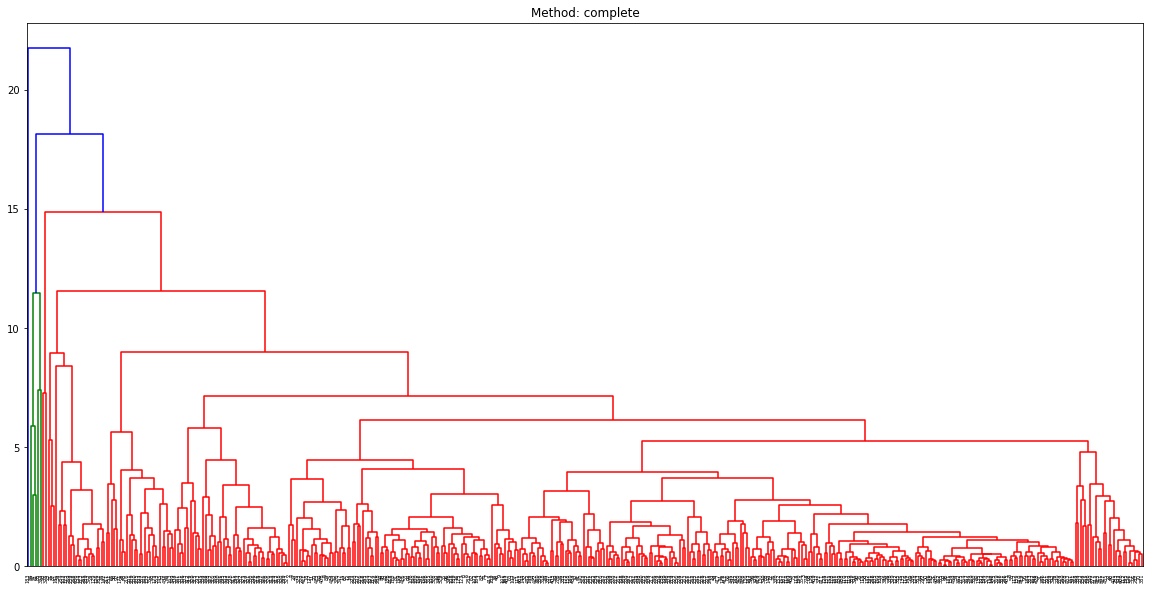

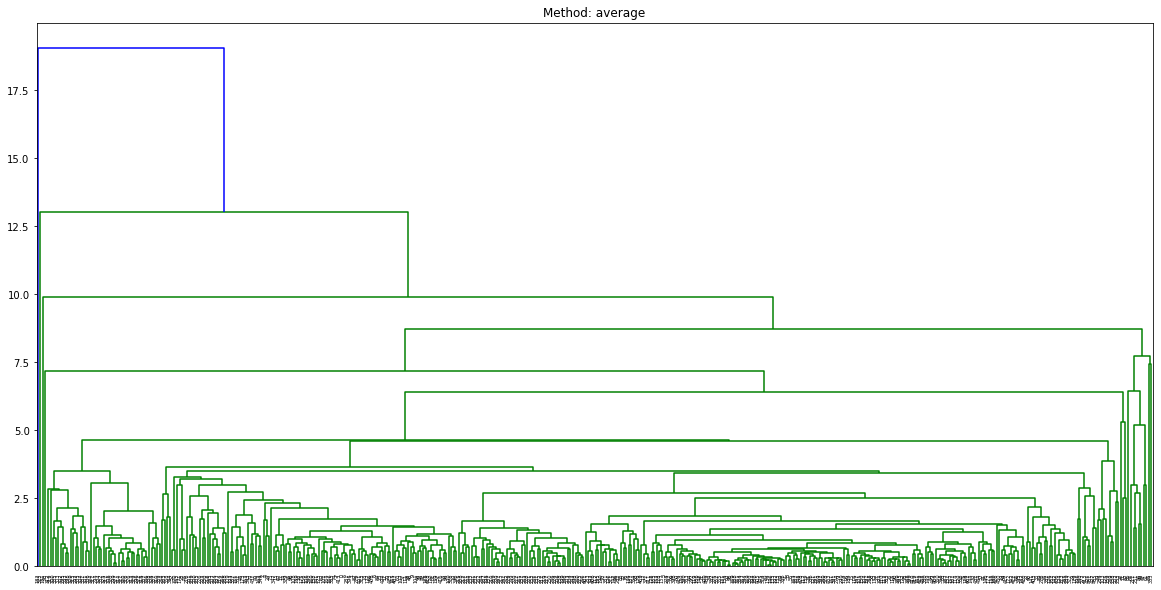

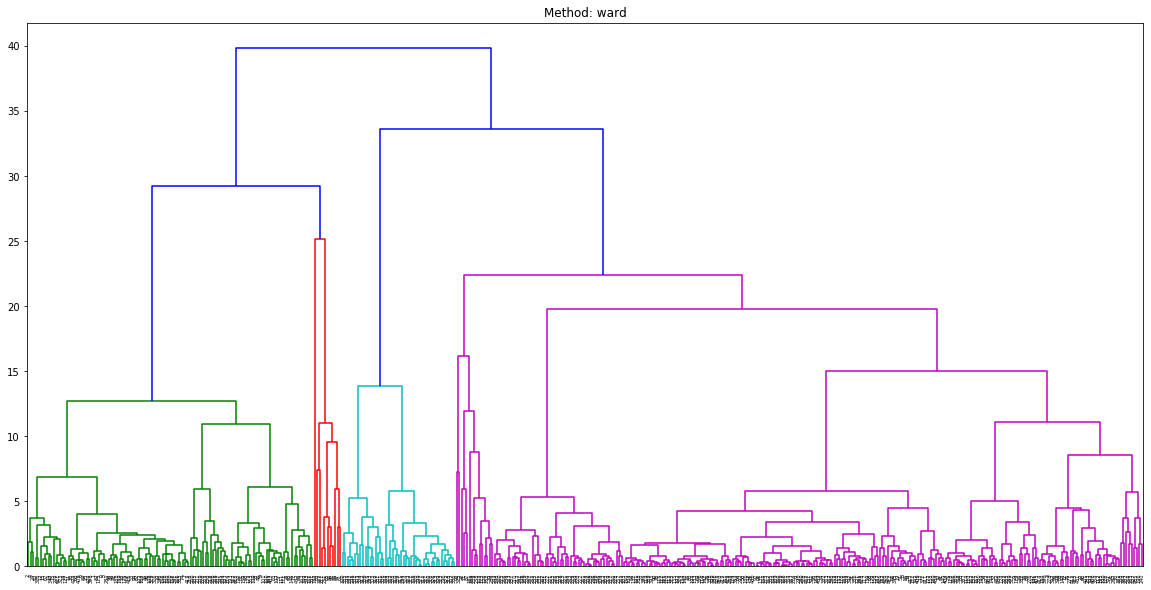

In [53]:
methods = ['complete', 'average', 'ward']

for method in methods:
    
    plt.figure(figsize=(20,10)) 

    dendrogram(linkage(X_std, method=method))

    plt.title('Method: {}'.format(method))

    plt.show()

Ward produces most reasonable results among three methods. Then, tune hyperparameters and check different solutions. 

In [159]:
sihouette = []
n_clusters = []

for n_cluster in range(2,6):
    
    agg = AgglomerativeClustering(linkage="ward", 
                                  affinity='euclidean',
                                  n_clusters=n_cluster)

    y_pred = agg.fit_predict(X_std)

    sih = metrics.silhouette_score(X_std, y_pred, metric='euclidean')

    n_clusters.append(n_cluster)
    sihouette.append(sih)

In [161]:
data = {'N_Cluster': n_clusters,
        'Sihouette': sihouette 
       }

result = pd.DataFrame(data=data)

result.sort_values(['Sihouette'], ascending=False)

,N_Cluster,Sihouette
1,3,0.376845
3,5,0.367926
2,4,0.364083
0,2,0.316011


The 3-cluster solution with ward linkage method produces the highest Sihouette score of 0.377. 

### 3. DBSCAN 

In [98]:
from sklearn.cluster import DBSCAN

In [105]:
min_samples = []
n_clusters = []
sihouette = []

In [106]:
for min_sample in range(1, 101):
    
    dbscan = DBSCAN(eps=1, min_samples=min_sample, metric='euclidean')

    y_pred = dbscan.fit_predict(X_std)
    
    sih = metrics.silhouette_score(X_std, y_pred, metric='euclidean')
    
    min_samples.append(min_sample)
    n_clusters.append(len(np.unique(y_pred)))
    sihouette.append(sih)

In [109]:
data = {'min_samples' : min_samples,
        'n_clusters'  : n_clusters,
        'Sihouette'   : sihouette 
       }

result = pd.DataFrame(data=data)

result.sort_values(['Sihouette'], ascending=False).head()

,min_samples,n_clusters,Sihouette
5,6,5,0.319941
6,7,5,0.317528
4,5,7,0.315542
2,3,12,0.306732
7,8,5,0.304988


The 5-cluster solution with 6 minimum samples produces the highest Sihouette score of 0.320. 

### 4. GMM

In [162]:
from sklearn.mixture import GaussianMixture
import itertools

In [163]:
covs = ['full', 'tied', 'diag', 'spherical']
n_cluster_values = range(2,6)

covariance = []
sihouette = []
n_clusters = []

In [164]:
for cov_type, n_cluster in itertools.product(covs, n_cluster_values):
    
    gmm_cluster = GaussianMixture(n_components=n_cluster, 
                                  random_state=123, 
                                  covariance_type=cov_type)

    y_pred = gmm_cluster.fit_predict(X_std)

    sih = metrics.silhouette_score(X_std, y_pred, metric='euclidean')
    
    sihouette.append(sih)
    covariance.append(cov_type)
    n_clusters.append(n_cluster)

In [165]:
data = {'N_Cluster'        : n_clusters, 
        'Covariance Type'  : covariance,
        'Sihouette'        : sihouette 
}

result = pd.DataFrame(data=data)

result.sort_values(['Sihouette'], ascending=False)

,N_Cluster,Covariance Type,Sihouette
3,5,full,0.363375
7,5,tied,0.355577
2,4,full,0.350287
10,4,diag,0.349692
11,5,diag,0.343812
0,2,full,0.338840
4,2,tied,0.338840
8,2,diag,0.338840
5,3,tied,0.327428
1,3,full,0.321802


The 5-cluster solution with full covariance type produces the highest Sihouette score of 0.363. 

To summarize, 

In [166]:
method = ['K-means', 'Hierarchical Clustering', 'DBSCAN', 'GMM']

n_clusters = [3, 3, 5, 5]

sihouette = [0.383, 0.377, 0.320, 0.363]

data = {'Method'           : method, 
        'N_Cluster'        : n_clusters, 
        'Sihouette'        : sihouette 
       }

summary = pd.DataFrame(data=data)

print('Summary')

summary.sort_values(['Sihouette'], ascending=False)

Summary


,Method,N_Cluster,Sihouette
0,K-means,3,0.383
1,Hierarchical Clustering,3,0.377
3,GMM,5,0.363
2,DBSCAN,5,0.320


Among all these clustering methods, K-means with 3-cluster solution provides the highest Sihouette score of 0.383. 

## Plot K-means solution 

In [174]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [175]:
y_pred = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)

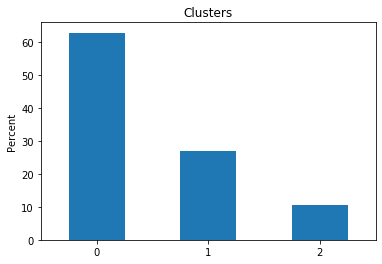

In [176]:
outcome = pd.DataFrame(y_pred, columns=['Cluster'])

cluster = (outcome['Cluster'].value_counts(normalize=True).rename('Percent').mul(100))

cluster.plot(kind='bar', figsize=(6,4))

plt.xticks(rotation=360)
plt.ylabel('Percent')
plt.title('Clusters')

plt.show()

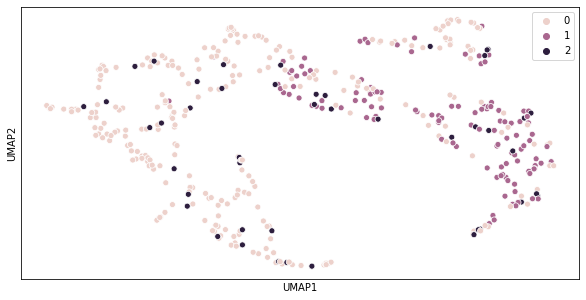

In [134]:
plt.figure(figsize=(10,5))

sns.scatterplot(umap_results[:,0], umap_results[:,1], hue=y_pred)

plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.xticks([])
plt.yticks([])
plt.show()

The results indicate that there are three clusters underlying the data. Majority clients (62%) are in the first cluster, 27% clients are in the second cluster and remaining 11% clients are in the third cluster. As shown in the scatter plot, cluster 0 is mostly towards the lower side of the first UMAP component and the other two clusters are towards the upper side of this component and they are mostly intertwined.  